In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

directory = '18pos_250_400MHz_750freqpts_cons5.9e6_perm1000_realDimentions_nonAWE_180Ohm_E_1x_0y_0z_wallDrive/' #include trailing `/`
hfDf = pd.read_pickle(directory+'dataDf.npy')
print(hfDf.shape)
hfDf.head()

directory = './18pos_50_260MHz_827freqpts_500Q_cons5.9e6_perm1000_realDimentions_realPositions_nonAWE_180Ohm_E_1x_0y_0z_wallDrive_2_4_23/' #include trailing `/`
lfDf = pd.read_pickle(directory+'dataDf.npy')
print(lfDf.shape)
lfDf.head()

#combine DF
result = pd.concat([hfDf, lfDf], ignore_index=True)
print(result.shape)
df = result.sort_values(by=['positionIdx', 'freq(MHz)'])

#import copper df
directory = './18pos_50_400MHz_1042freqpts_500Q_cons5.9e6_perm1_realDimentions_realPositions_nonAWE_180Ohm_E_1x_0y_0z_wallDrive_2_10_23/' #include trailing `/`
dfCu = pd.read_pickle(directory+'dataDf.npy')



#import free space LPV
freqs_freespace = np.loadtxt('./LPV_dipole_3cmThick_freespace_180ohms_1vmPlanewave_2_6_23.txt', usecols=0, delimiter=' ', skiprows = 5)
LPV_freespace = np.loadtxt('./LPV_dipole_3cmThick_freespace_180ohms_1vmPlanewave_2_6_23.txt', usecols=1, skiprows = 5)



def moving_average(data, window_size):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    ma_vec = (cumsum_vec[window_size-1:] - cumsum_vec[:-window_size+1]) / window_size
    padding = np.full(window_size // 2, np.nan)
    return np.concatenate((padding, ma_vec, padding))[1:-1]


(13500, 11)
(14886, 11)
(28386, 11)


average AF for E_all/V =  35.797555446624756
average AF for E_near/V =  36.38193130493164
average AF for 1/V =  21.69736623764038
average AF for free space =  5.935921255167437


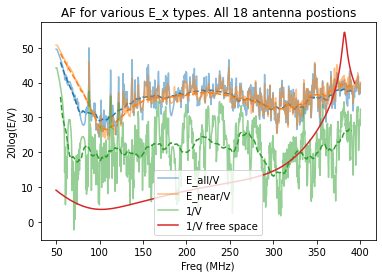

In [6]:
LPV_allPos     = df.groupby('freq(MHz)').mean()['LPV'].to_numpy()
E_all_allPos   = df.groupby('freq(MHz)').mean()['Ex_all'].to_numpy()
E_near_allPos  = df.groupby('freq(MHz)').mean()['Ex_near'].to_numpy()
freqs          = df.groupby('freq(MHz)').mean().index.to_numpy()




color = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.close('all')
plt.figure()
plt.title('AF for various E_x types. All 18 antenna postions')
plt.plot(freqs, 20*np.log10(E_all_allPos/LPV_allPos), color = color[0], label='E_all/V', alpha = .5)
plt.plot(freqs, moving_average(20*np.log10(E_all_allPos/LPV_allPos), 100), '--',  color = color[0])
plt.plot(freqs, 20*np.log10(E_near_allPos/LPV_allPos), label='E_near/V', alpha =.5, color = color[1])
plt.plot(freqs, moving_average(20*np.log10(E_near_allPos/LPV_allPos), 100), '--', color = color[1])
plt.plot(freqs, 20*np.log10(1/LPV_allPos), label='1/V', color = color[2], alpha = .5)
plt.plot(freqs, moving_average(20*np.log10(1/LPV_allPos), 100), '--', color = color[2])
plt.plot(freqs_freespace[0:330], 20*np.log10(1/LPV_freespace)[:330], label = '1/V free space', color = color[3])

plt.xlabel('Freq (MHz)')
plt.ylabel('20log(E/V)')
plt.legend()

print('average AF for E_all/V = ', 20*np.log10(E_all_allPos/LPV_allPos)[:].mean())
print('average AF for E_near/V = ', 20*np.log10(E_near_allPos/LPV_allPos)[:].mean())
print('average AF for 1/V = ', 20*np.log10(1/LPV_allPos)[:].mean())
print('average AF for free space = ', 20*np.log10(1/LPV_freespace)[0:30].mean())

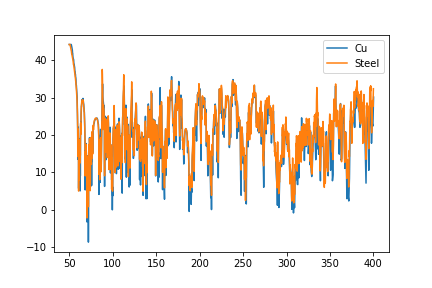

In [10]:
#compare copper to steel
%matplotlib widget
LPV_allPosCu     = dfCu.groupby('freq(MHz)').mean()['LPV'].to_numpy()
E_all_allPosCu   = dfCu.groupby('freq(MHz)').mean()['Ex_all'].to_numpy()
E_near_allPosCu  = dfCu.groupby('freq(MHz)').mean()['Ex_near'].to_numpy()
freqsCu          = dfCu.groupby('freq(MHz)').mean().index.to_numpy()


plt.plot(freqsCu, 20*np.log10(1/LPV_allPosCu), label = 'Cu')
plt.plot(freqs, 20*np.log10(1/LPV_allPos), label = 'Steel')
plt.legend()


In [3]:
sumDf = pd.DataFrame()
sumDf = df.loc[(df['positionIdx']==i)]
for i in range(2):
    sumDf = sumDf + df.loc[(df['positionIdx']==i)]
sumDf

NameError: name 'i' is not defined

0.12043288
0.20366626984894146


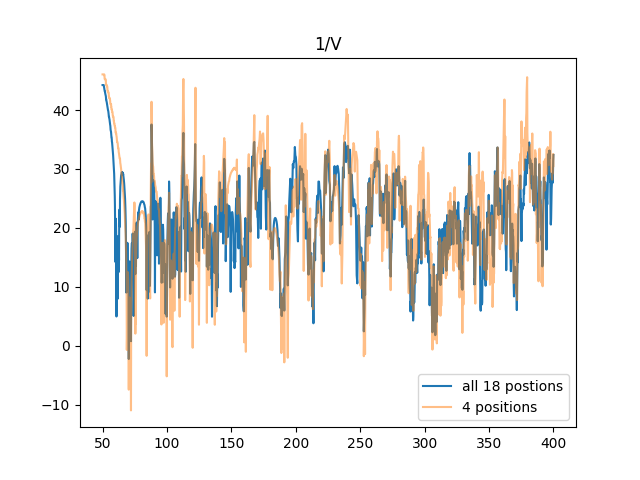

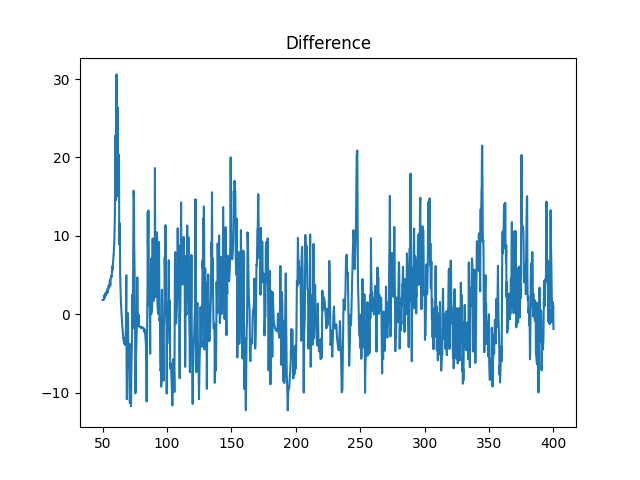

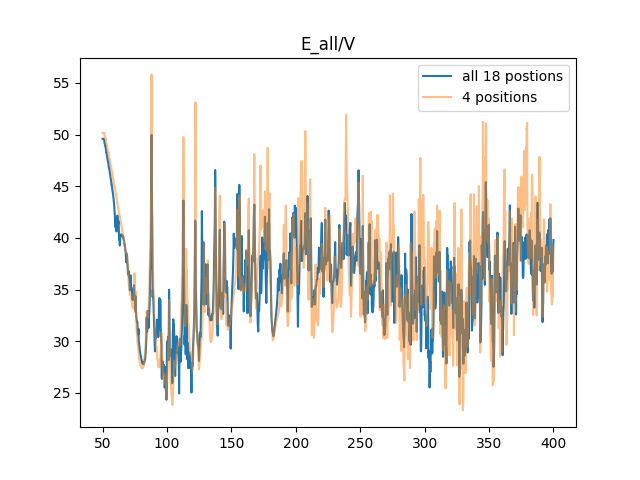

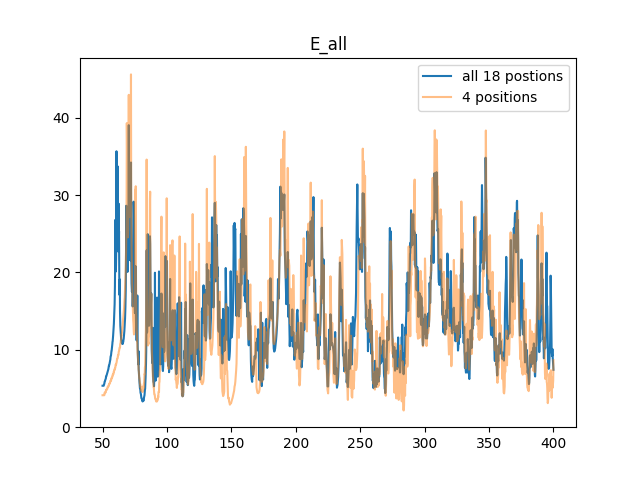

In [76]:
postionsList = [0,2,17, 9]

vSumDf = df.loc[df['positionIdx']==1].reset_index(drop=True)
vSumDf.iloc[:,:] = 0
for position in postionsList:
    vSumDf  = vSumDf + df.loc[df['positionIdx']==position].iloc[:,2:].reset_index(drop=True)
vSumDf/=len(postionsList)


LPV_all     = df.groupby('freq(MHz)').mean()['LPV'].to_numpy()
LPV_boot    = vSumDf['LPV'].to_numpy()

eAllSumDf = df.loc[df['positionIdx']==1].reset_index(drop=True)
eAllSumDf.iloc[:,:] = 0
for position in postionsList:
    eAllSumDf  = eAllSumDf + df.loc[df['positionIdx']==position].iloc[:,2:].reset_index(drop=True)
eAllSumDf/=len(postionsList)

E_all     = df.groupby('freq(MHz)').mean()['Ex_all'].to_numpy()
E_all_boot    = vSumDf['Ex_all'].to_numpy()


plt.figure()
plt.title('1/V')
plt.plot(freqs, 20*np.log10(1/LPV_all), label ='all 18 postions')
plt.plot(freqs, 20*np.log10(1/LPV_boot), label = f'{len(postionsList)} positions', alpha = .5)
plt.legend()

if 1:
    plt.figure()
    plt.title('Difference')
    plt.plot(freqs, 20*np.log10(1/LPV_boot)-20*np.log10(1/LPV_all))


plt.figure()
plt.title('E_all/V')
plt.plot(freqs, 20*np.log10(E_all/LPV_all), label ='all 18 postions')
plt.plot(freqs, 20*np.log10(E_all_boot/LPV_boot), label = f'{len(postionsList)} positions', alpha = .5)
plt.legend()

plt.figure()
plt.title('E_all')
plt.plot(freqs, 20*np.log10(E_all), label ='all 18 postions')
plt.plot(freqs, 20*np.log10(E_all_boot), label = f'{len(postionsList)} positions', alpha = .5)
plt.legend()

print(LPV_all.std())
print(LPV_boot.std())

In [ ]:
#note that x^2+y^2+z^2 != comsol E_norm^2

import matplotlib.pyplot as plt
%matplotlib widget
plt.close('all')
plt.figure()
plt.hist(( dfOut['Enorm_all'] -((dfOut['Ex_all']**2+dfOut['Ey_all']**2+dfOut['Ez_all']**2)**0.5 )).to_numpy(), log=True, bins = 1000);

plt.figure()
plt.hist(( dfOut['Enorm_near'] -((dfOut['Ex_near']**2+dfOut['Ey_near']**2+dfOut['Ez_near']**2)**0.5 )).to_numpy(), log=True, bins = 1000);



In [ ]:
#check that nan mean gives same as first value. taken from E_all Ex from file
#18pos_250_400MHz_750freqpts_cons5.9e6_perm1000_realDimentions_nonAWE_180Ohm_E_1x_0y_0z_wallDrive

a =[float('NaN'),                     float('NaN'),                      15.061594171613452,      float('NaN') ,                   float('NaN')       ,             float('NaN') ,                    10.987955833422253      ,float('NaN'),                     float('NaN'),                     float('NaN'),                      2.402071739079808 ,      float('NaN')      ,              float('NaN')   ,                 float('NaN') ,                    17.531840610789363      ,float('NaN'),                     6.059617775723454    ,    6.097829178943222  ,      14.62387249377226       , 5.127934420273548      ,  3.9582918181254776    ,   8.216028057593306   ,     37.52904136210943  ,      17.393536574981063  ,     5.726554203215482   ,     18.999572962628427      , 15.356668069873258    ,   31.986858040073557     ,  1.8424256615682568     ,  8.7167632101463       ,   7.3527999514281985    ,   15.84118339660775   ,     6.441727281674445 ,       13.717055460403888       ,0.9461027454174641 ,      4.744513698654297       , 17.677079369442954       ,28.99802365141824       , 7.77210998352825      ,   6.222064305264859   ,     27.133605882005973    ,   11.115905093526512      , 22.511096594558257      , 5.8355181109054675     ,  13.904215794126994      , 11.056934809785641     ,  8.428648650491725      ,  1.6549639451922653      ,float('NaN')   ,                  15.436930383416772   ,   float('NaN')    ,                float('NaN')       ,             float('NaN')         ,            15.78751348039556    ,   float('NaN')        ,            float('NaN')         ,           float('NaN')   ,                  6.480328710269199,       float('NaN'),                     float('NaN'),                     float('NaN'),                      17.777891698875962,      float('NaN'),                     float('NaN')]                
np.nanmean(np.asarray(a))